# Najbolj popularna piva na svetu

### Projektna naloga pri predmetu Programiranje 1

V tej projektni nalogi bom analiziral piva s pomočjo podatkov, ki jih bom analiziral s spletne strani https://www.beeradvocate.com/beer/top-rated/, kjer so podatki o 250 svetovno najbolj priljubljenih pivih na svetu.

Postavil sem si štiri hipoteze in sicer:
* med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"
* več kot polovica piv ima več kot 7% vsebovanost alkohola
* svetlo pivo je bolj priljubljeno od temnega
* največ glasov je prejelo ameriško pivo

Za začetek analize podatkov sem najprej pripravil delovno okolje.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import squarify

piva = pd.read_csv('../beer_ratings/csv_file.csv')

pd.options.display.max_rows = 20
#izklopi SettingwithCopyWarning
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

## Priprava podatkov za lažjo obravnavo

Ker sem v nadaljevanju projektne naloge piva ločeval glede na državo porekla, stopnjo alkohola in barvo piva, sem se odločil, da v tabelo piv dodam štiri nove stolpce, ki bodo pomagali pri lažji obravnavi podatkov. Stolpci, ki sem jih dodal v spodnji kodi, so:
* država porekla
* vrsta
* tip
* jakost

In [2]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']
drzave = ['American', 'British', 'English', 'England','Russian', 'Belgian']
piva['DRŽAVA'] = np.nan
piva['VRSTA'] = np.nan
piva['JAKOST'] = np.nan
piva['TIP'] = np.nan
#dodajanje v stolpec "JAKOST"
for i in range(len(piva)):
    if piva['STOPNJA_ALKOHOLA'][i]> 7:
        piva['JAKOST'][i] = "M"
    elif piva['STOPNJA_ALKOHOLA'][i]<=7:
        piva['JAKOST'][i] = "L"
#dodajanje v stolpca "VRSTA" in "TIP"
for i in range(len(piva)):            
    for pivo in tipi:
        if pivo in svetla:
            if pivo in piva['VRSTA_PIVA'][i]:
                piva['VRSTA'][i] = "S"
                piva['TIP'][i] = pivo
        elif pivo in temna:
            if pivo in piva['VRSTA_PIVA'][i]:
                piva['VRSTA'][i] = "T"
                piva['TIP'][i] = pivo
#dodajanje v stolpec "DRŽAVA"
for i in range(len(piva)):
    for drzava in drzave:
        if drzava in piva['VRSTA_PIVA'][i]:
            if drzava == "American":
                piva['DRŽAVA'][i] = "ZDA"
            elif drzava == "Russian":
                piva['DRŽAVA'][i] = "Rusija"
            elif drzava == "British" or drzava == "England" or drzava == "English":
                piva['DRŽAVA'][i] = "Združeno kraljestvo"
            else:
                piva['DRŽAVA'][i] = "Belgija"
piva

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA,DRŽAVA,VRSTA,JAKOST,TIP
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90,ZDA,T,M,Stout
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81,Rusija,T,M,Stout
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79,ZDA,T,M,Stout
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79,ZDA,T,M,Stout
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76,Združeno kraljestvo,S,M,IPA
...,...,...,...,...,...,...,...,...,...,...,...
245,246,Scaled Up,Trillium Brewing Company,New England IPA,8.0,934,4.46,Združeno kraljestvo,S,M,IPA
246,247,Dragonsaddle,Hoof Hearted Brewing,New England IPA,11.5,338,4.50,Združeno kraljestvo,S,M,IPA
247,248,Flora - Blueberry,Hill Farmstead Brewery,Belgian Saison,NaN,256,4.52,Belgija,S,NaN,Saison
248,249,Madagascar,4 Hands Brewing Co.,English Sweet / Milk Stout,9.3,891,4.46,Združeno kraljestvo,T,M,Stout


# 1. Predstavitev teme

Piva sem v Python datoteki ločil v 7 kategorij, ki sem jih shranil v .csv datoteko. Te so (po vrsti):
* mesto na lestvici (razvrščeno po priljubljenosti)
* ime piva
* pivnice izdelave
* vrsta piva
* stopnja vsebovanosti alkohola v pivu
* število ljudi, ki je glasovalo za poljubno pivo
* povprečna ocena (vsota ocen / število glasov)

Tem sem dodal še štiri za lažje in preglednejše pisanje funkcij. Te kategorije so:
* država porekla
* vrsta
* tip
* jakost

In [3]:
piva

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA,DRŽAVA,VRSTA,JAKOST,TIP
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90,ZDA,T,M,Stout
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81,Rusija,T,M,Stout
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79,ZDA,T,M,Stout
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79,ZDA,T,M,Stout
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76,Združeno kraljestvo,S,M,IPA
...,...,...,...,...,...,...,...,...,...,...,...
245,246,Scaled Up,Trillium Brewing Company,New England IPA,8.0,934,4.46,Združeno kraljestvo,S,M,IPA
246,247,Dragonsaddle,Hoof Hearted Brewing,New England IPA,11.5,338,4.50,Združeno kraljestvo,S,M,IPA
247,248,Flora - Blueberry,Hill Farmstead Brewery,Belgian Saison,NaN,256,4.52,Belgija,S,NaN,Saison
248,249,Madagascar,4 Hands Brewing Co.,English Sweet / Milk Stout,9.3,891,4.46,Združeno kraljestvo,T,M,Stout


Razpredelnica 250 svetovno najbolj priljubljenih piv, sodeč po spletni strani https://www.beeradvocate.com/beer/top-rated/.

### najbolje ocenjena piva

In [4]:
najboljse_ocene = piva.sort_values('AVG_OCENA', ascending=[False])
najboljse_ocene[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA,DRŽAVA,VRSTA,JAKOST,TIP
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90,ZDA,T,M,Stout
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81,Rusija,T,M,Stout
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79,ZDA,T,M,Stout
51,52,Very GGGreennn,Tree House Brewing Company,New England IPA,8.3,134,4.79,Združeno kraljestvo,S,M,IPA
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79,ZDA,T,M,Stout
9,10,King JJJuliusss,Tree House Brewing Company,New England IPA,8.4,528,4.78,Združeno kraljestvo,S,M,IPA
5,6,King Julius,Tree House Brewing Company,New England IPA,8.3,1090,4.77,Združeno kraljestvo,S,M,IPA
11,12,SR-71,Toppling Goliath Brewing Company,American Imperial Stout,14.0,514,4.76,ZDA,T,M,Stout
20,21,Zenne Y Frontera,Brouwerij 3 Fonteinen,Belgian Lambic,7.0,296,4.76,Belgija,S,L,Lambic
8,9,Very Hazy,Tree House Brewing Company,New England IPA,8.6,958,4.76,Združeno kraljestvo,S,M,IPA


### piva, v katerih je največ alkohola

In [5]:
najbolj_alkoholizirana = piva.sort_values('STOPNJA_ALKOHOLA', ascending=[False])
najbolj_alkoholizirana[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA,DRŽAVA,VRSTA,JAKOST,TIP
110,111,Samuel Adams Utopias,Boston Beer Company (Samuel Adams),American Strong Ale,28.0,2692,4.54,ZDA,S,M,Ale
125,126,Black Tuesday - Reserve,The Bruery,American Imperial Stout,20.5,267,4.61,ZDA,T,M,Stout
116,117,Grey Monday,The Bruery,American Imperial Stout,19.9,1879,4.54,ZDA,T,M,Stout
132,133,Mocha Wednesday,The Bruery,American Imperial Stout,19.9,1454,4.53,ZDA,T,M,Stout
60,61,Chocolate Rain,The Bruery,American Imperial Stout,19.6,2816,4.59,ZDA,T,M,Stout
56,57,Black Tuesday,The Bruery,American Imperial Stout,19.5,4093,4.59,ZDA,T,M,Stout
95,96,A Deal With The Devil,Anchorage Brewing Company,American Barleywine,17.3,1092,4.57,ZDA,T,M,Barleywine
99,100,It Was All A Dream,J. Wakefield Brewing,American Imperial Stout,17.0,127,4.74,ZDA,T,M,Stout
212,213,Tweak,Avery Brewing Company,American Imperial Stout,16.0,2638,4.47,ZDA,T,M,Stout
79,80,Bourbon Paradise,Prairie Artisan Ales,American Imperial Stout,15.9,503,4.61,ZDA,T,M,Stout


### piva, za katera je glasovalo največ ljudi

In [6]:
najbolj_glasovana_piva = piva.sort_values('ST_GLASOV', ascending=[False])
najbolj_glasovana_piva[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA,DRŽAVA,VRSTA,JAKOST,TIP
89,90,Breakfast Stout,Founders Brewing Company,American Imperial Stout,8.3,17483,4.55,ZDA,T,M,Stout
14,15,Pliny The Elder,Russian River Brewing Company,American Imperial IPA,8.0,15218,4.69,ZDA,S,M,IPA
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76,Združeno kraljestvo,S,M,IPA
26,27,KBS (Kentucky Breakfast Stout),Founders Brewing Company,American Imperial Stout,12.3,13713,4.65,ZDA,T,M,Stout
164,165,Hopslam Ale,Bell's Brewery - Eccentric Café & General Store,American Imperial IPA,10.0,13708,4.49,ZDA,S,M,IPA
22,23,Bourbon County Brand Stout,Goose Island Beer Co.,American Imperial Stout,14.7,12957,4.66,ZDA,T,M,Stout
244,245,Enjoy By IPA,Stone Brewing,American Imperial IPA,9.4,11106,4.44,ZDA,S,M,IPA
33,34,Zombie Dust,3 Floyds Brewing Co.,American Pale Ale (APA),6.2,10731,4.63,ZDA,S,L,Ale
155,156,Abt 12,Brouwerij St. Bernardus NV,Belgian Quadrupel (Quad),10.0,9989,4.50,Belgija,T,M,Quad
94,95,Trappistes Rochefort 10,Brasserie de Rochefort,Belgian Quadrupel (Quad),11.3,9662,4.55,Belgija,T,M,Quad


# 2. Analiza podatkov

### 2.1 prva hipoteza
*med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"*

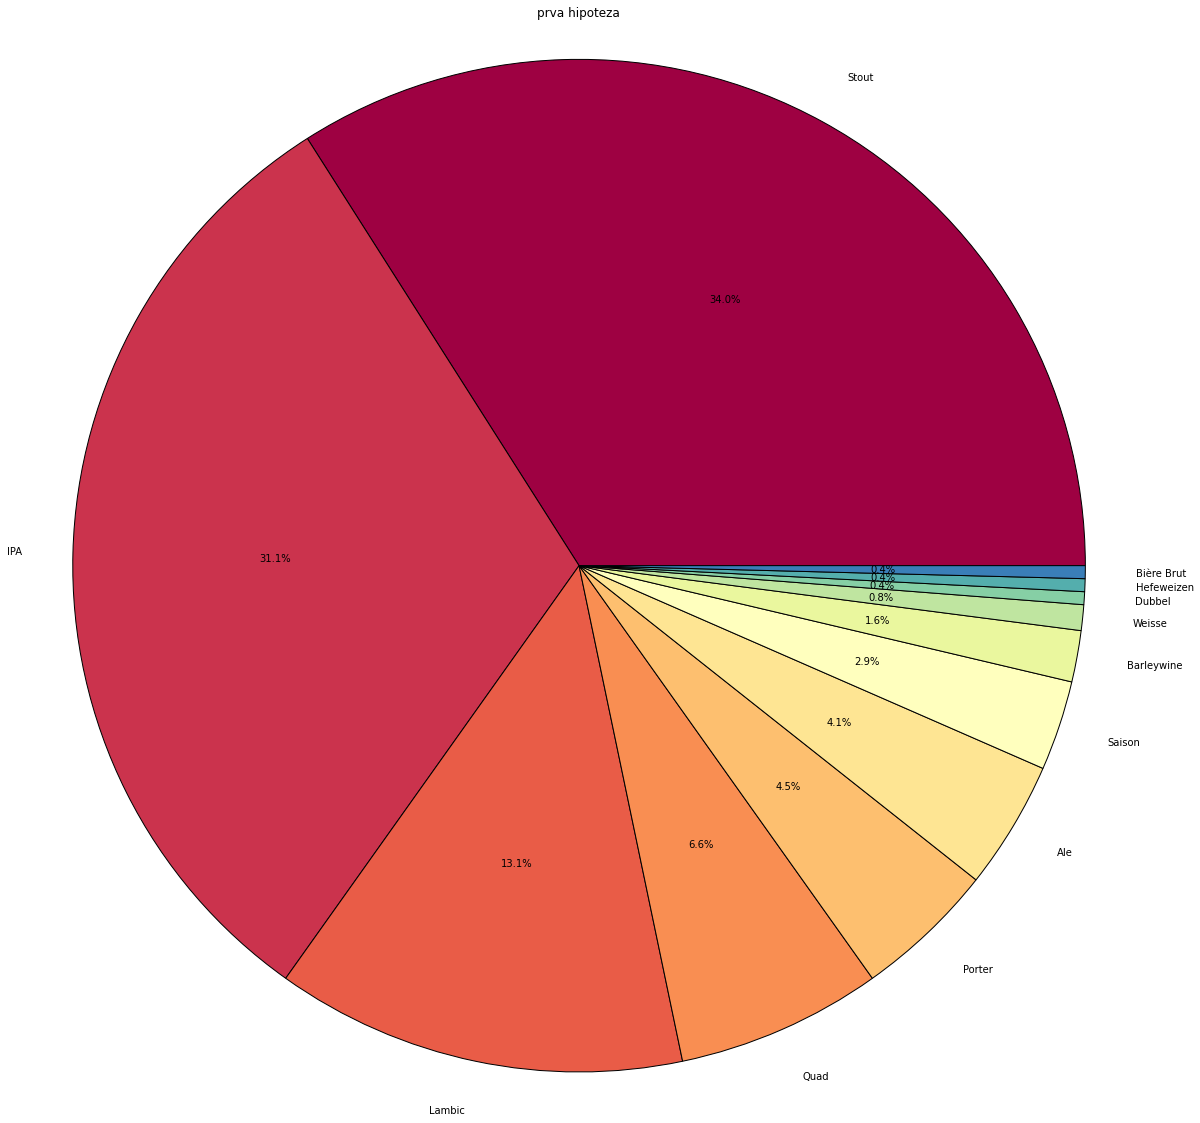

In [15]:
#pri različnih vrednostih ignoriramo NaN
labels = piva.TIP.dropna().unique()
score = piva.TIP.value_counts()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(score))]
plt.pie(score, colors=colors,labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%0.1f%%')
plt.title("prva hipoteza")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

### Rezultat
Iz rezultatov je jasno razvidno, da je bila priljubljenost piv tipa "IPA" rahlo precenjena, priljubljenost piv tipa "ALE" pa precej podcenjena.

### 2.2 druga hipoteza

*več kot polovica piv ima vsebovanost alkohola višjo kot 7 %*

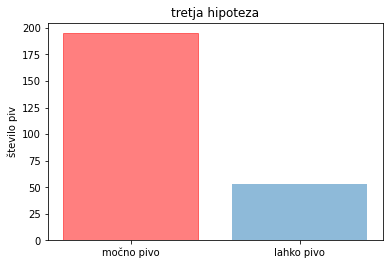

In [8]:
kategorije = ['močno pivo', 'lahko pivo']
število_piv = piva.JAKOST.value_counts()
barlist = plt.bar(kategorije, število_piv, align='center', alpha=0.5)
barlist[0].set_color('r')
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('tretja hipoteza')
plt.show()

### Rezultat
Drugo hipotezo lahko zaradi jasne prevlade piv, s stopnjo alkohola višjo od 7 %, v celoti potrdim.

### 2.3 tretja hipoteza
*svetlo pivo je bolj priljubljeno od temnega*

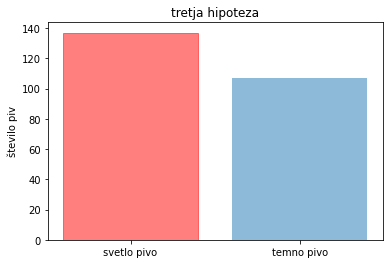

In [9]:
kategorije = ['svetlo pivo', 'temno pivo']
število_piv = piva.VRSTA.value_counts()
barlist = plt.bar(kategorije, število_piv, align='center', alpha=0.5)
barlist[0].set_color('r')
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('tretja hipoteza')
plt.show()

### Rezultat
Tretjo hipotezo lahko potrdim, čeprav se je temno pivo izkazalo za veliko bolj priljubljenega, kot sem prvotno pričakoval.

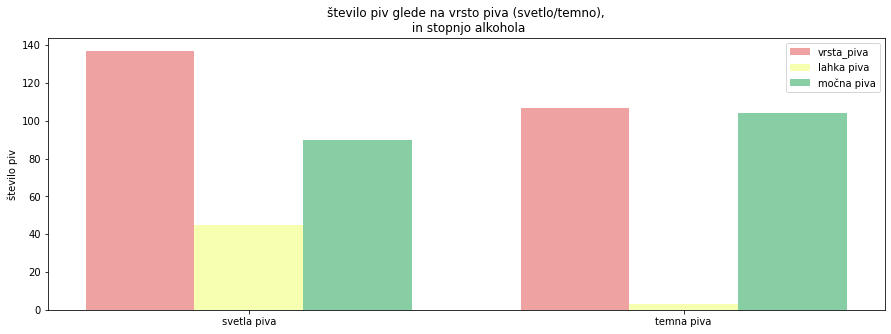

In [10]:
labels = ['svetla piva', 'temna piva']
vrsta_piva = piva.VRSTA.value_counts()

skupine = piva.groupby(["JAKOST", "VRSTA"]).size()
lahka = [skupine[0], skupine[1]]
močna = [skupine[2], skupine[3]]

x = np.arange(2)
width = 0.25
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - 0.25, vrsta_piva, width, color='#e14646', label='vrsta_piva', alpha=0.5)
rects2 = ax.bar(x, lahka, width, color='#f1ff65', label='lahka piva', alpha=0.5)
rects3 = ax.bar(x + 0.25, močna, width, color='#129e4d', label='močna piva', alpha=0.5)
ax.set_ylabel('število piv')
ax.set_title('število piv glede na vrsto piva (svetlo/temno),\n in stopnjo alkohola')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Drugo in tretjo hipotezo sem združil v skupen graf, za bolj nazoren prikaz. Poleg potrjene druge in tretje hipoteze je lepo prikazana tudi korelacija med vrsto piva in stopnjo vsebovanega alkohola. Svetlo pivo je navadno lažje od temnega, kot je tudi nazorno prikazano na tem grafu.

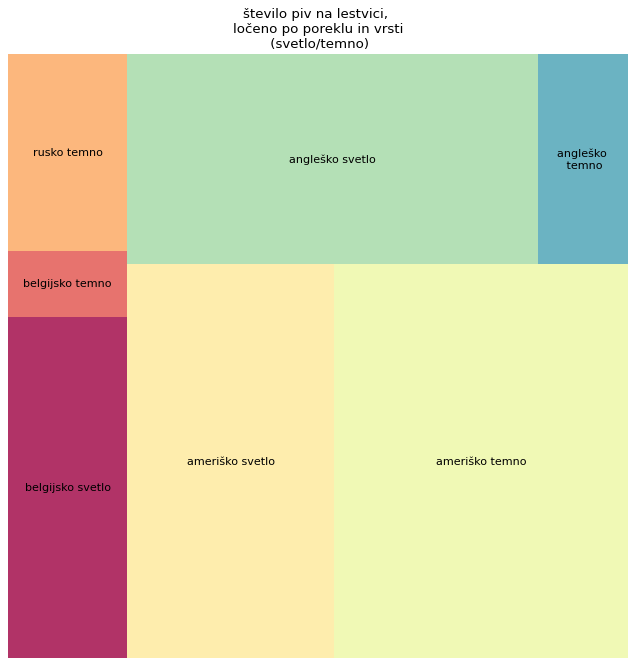

In [11]:
sizes = piva.groupby(["DRŽAVA", "VRSTA"]).size()
labels = ['belgijsko svetlo', 'belgijsko temno', 'rusko temno', 'ameriško svetlo', 'ameriško temno', 'angleško svetlo', 'angleško \n temno']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(sizes))]
plt.figure(figsize=(10,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.8)
plt.title('število piv na lestvici, \nločeno po poreklu in vrsti\n (svetlo/temno)')
plt.axis('off')
plt.show()

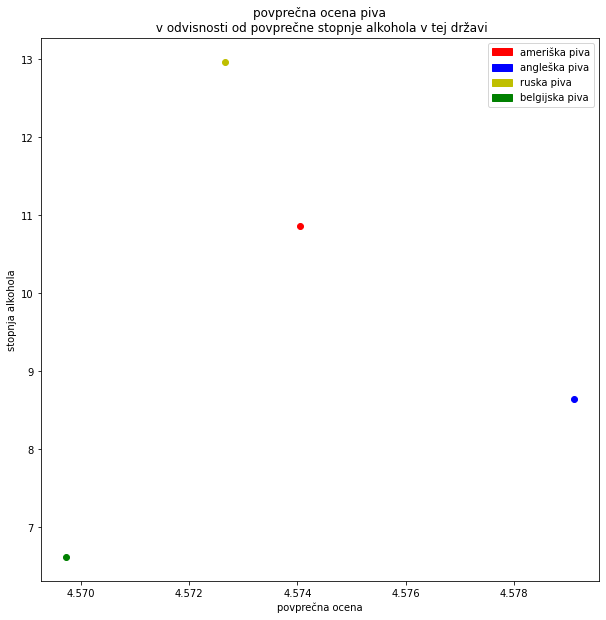

In [12]:
#za vsako državo x - komponento predstavlja skupna povprečna ocena vseh piv
#za vako državo y - komponento predstavlja skupna povprečna stopnja alkohola
X1= np.array(piva[piva['DRŽAVA']=="ZDA"]['AVG_OCENA'].sum()/(piva.DRŽAVA == "ZDA").sum())
Y1= np.array(piva[piva['DRŽAVA']=="ZDA"]['STOPNJA_ALKOHOLA'].sum()/(piva.DRŽAVA == "ZDA").sum())
X2= np.array(piva[piva['DRŽAVA']=="Združeno kraljestvo"]['AVG_OCENA'].sum()/(piva.DRŽAVA == "Združeno kraljestvo").sum())
Y2= np.array(piva[piva['DRŽAVA']=="Združeno kraljestvo"]['STOPNJA_ALKOHOLA'].sum()/(piva.DRŽAVA == "Združeno kraljestvo").sum())
X3= np.array(piva[piva['DRŽAVA']=="Rusija"]['AVG_OCENA'].sum()/(piva.DRŽAVA == "Rusija").sum())
Y3= np.array(piva[piva['DRŽAVA']=="Rusija"]['STOPNJA_ALKOHOLA'].sum()/(piva.DRŽAVA == "Rusija").sum())
X4= np.array(piva[piva['DRŽAVA']=="Belgija"]['AVG_OCENA'].sum()/(piva.DRŽAVA == "Belgija").sum())
Y4= np.array(piva[piva['DRŽAVA']=="Belgija"]['STOPNJA_ALKOHOLA'].sum()/(piva.DRŽAVA == "Belgija").sum())

plt.figure(figsize=(10, 10))
plt.scatter(X1,Y1, color = 'r')
plt.scatter(X2,Y2, color = 'b')
plt.scatter(X3,Y3, color = 'y')
plt.scatter(X4,Y4, color = 'g')
am_legend = mpatches.Patch(color='r', label='ameriška piva')
brit_legend = mpatches.Patch(color='b', label='angleška piva')
russ_legend = mpatches.Patch(color='y', label='ruska piva')
belg_legend = mpatches.Patch(color='g', label='belgijska piva')
plt.xlabel('povprečna ocena')
plt.ylabel('stopnja alkohola')
plt.legend(handles=[am_legend, brit_legend, russ_legend, belg_legend])
plt.title('povprečna ocena piva\n v odvisnosti od povprečne stopnje alkohola v tej državi')
plt.show()

### 2.4 četrta hipoteza
*za ameriška piva je glasovalo največ ljudi*

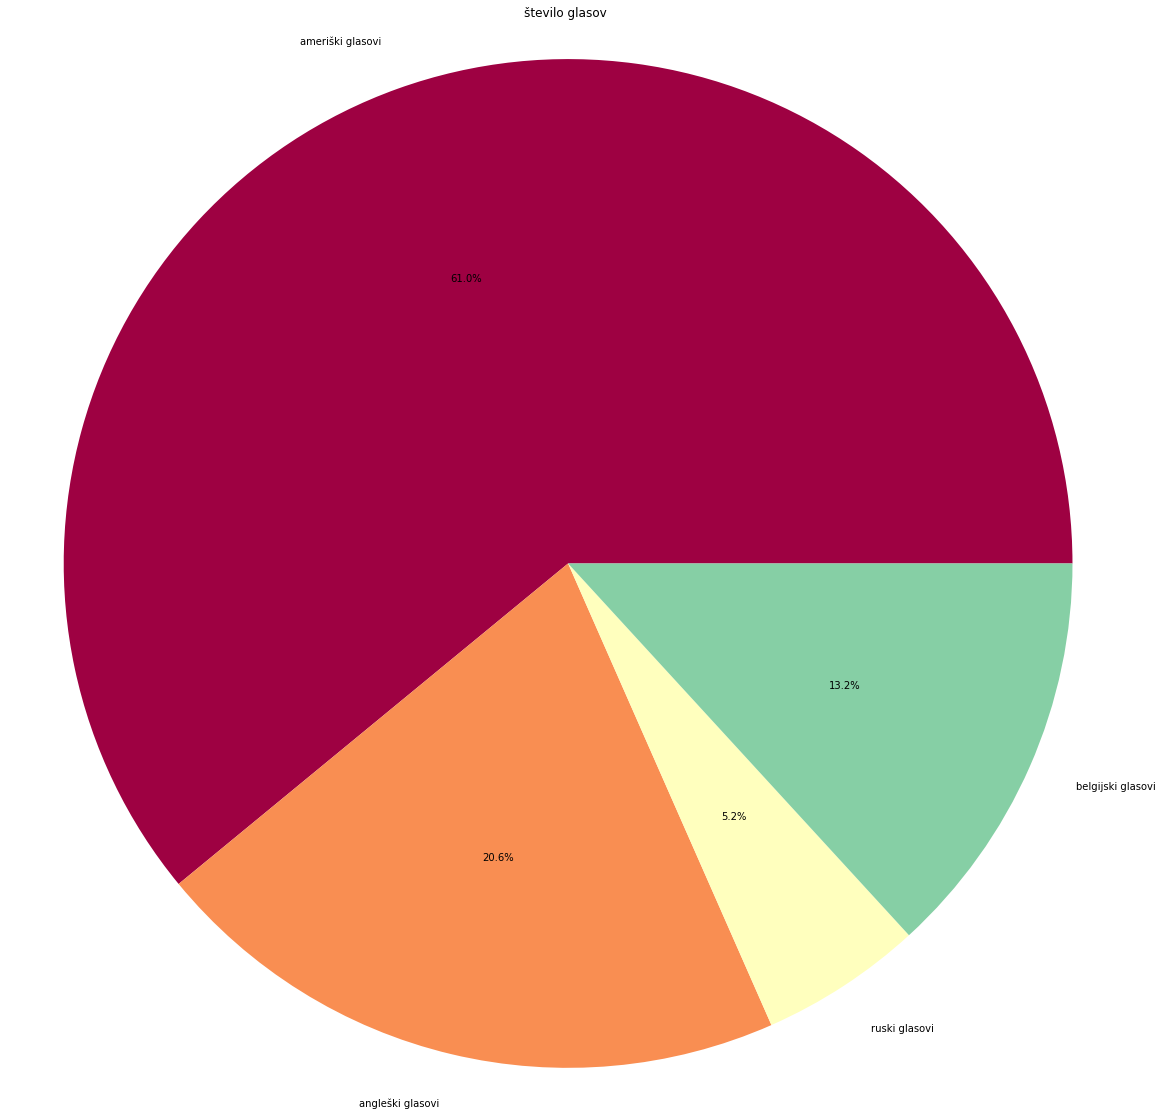

In [16]:
labels = ['ameriški glasovi', 'angleški glasovi', 'ruski glasovi', 'belgijski glasovi']
skupine = piva.DRŽAVA.value_counts()
score = [piva[piva['DRŽAVA']=="ZDA"]["ST_GLASOV"].sum(), 
         piva[piva['DRŽAVA']=="Združeno kraljestvo"]["ST_GLASOV"].sum(), 
         piva[piva['DRŽAVA']=="Rusija"]["ST_GLASOV"].sum(), 
         piva[piva['DRŽAVA']=="Belgija"]["ST_GLASOV"].sum()]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(5)]
plt.pie(score, colors=colors,labels=labels, autopct='%0.1f%%')
plt.title("število glasov")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

# Zaključek
V projektni nalogi sem spoznal statistiko o 250 najbolj priljubljenih pivih. Sumim sicer, da je celotna zadeva ocenjena nekoliko objektivno, saj je to ameriška spletna stran, hkrati pa med 250 najbolj priljubljenimi pivi ni nobenega nemškega, kar se zdi samo po sebi precej narobe. Pri izdelavi projektne naloge sta me presenetili dve dejstvi; prvič, kot omenjeno, na lestvici ni nemških piv in drugič, čeprav je svetovno gledano rusko pivo med bolj priljubljenimi, na lestvici bolj priljubljenih ni niti enega svetlega ruskega piva.